### Description: On-Balance-volume (OBV) Stock Trading strategy used to determine when to buy and sell stocks.

## On Balance Volume in Stock Market
- On balance volume (OBV) is a technical trading momentum indicator that uses volume flow to predict changes in stock price. ... He believed that when volume increases sharply without a significant change in the stock's price, the price will eventually jump upward or fall downward. (source: google Jan 25,2021)

Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Get the stock quote

In [ ]:
df = web.DataReader('AMZN', data_source = 'yahoo', start = '2020-01-01', end = '2021-01-24')

Show the Data

In [ ]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,1898.010010,1864.150024,1875.000000,1898.010010,4029000,1898.010010
2020-01-03,1886.199951,1864.500000,1864.500000,1874.969971,3764400,1874.969971
2020-01-06,1903.689941,1860.000000,1860.000000,1902.880005,4061800,1902.880005
2020-01-07,1913.890015,1892.040039,1904.500000,1906.859985,4044900,1906.859985
2020-01-08,1911.000000,1886.439941,1898.040039,1891.969971,3508000,1891.969971
...,...,...,...,...,...,...
2021-01-15,3142.550049,3095.169922,3123.020020,3104.250000,4214200,3104.250000
2021-01-19,3145.000000,3096.000000,3107.000000,3120.760010,3305100,3120.760010
2021-01-20,3279.800049,3175.000000,3181.989990,3263.379883,5309800,3263.379883


Get the number of rows and columns in the data set

In [ ]:
df.shape

(267, 6)

Visualize the closing price history

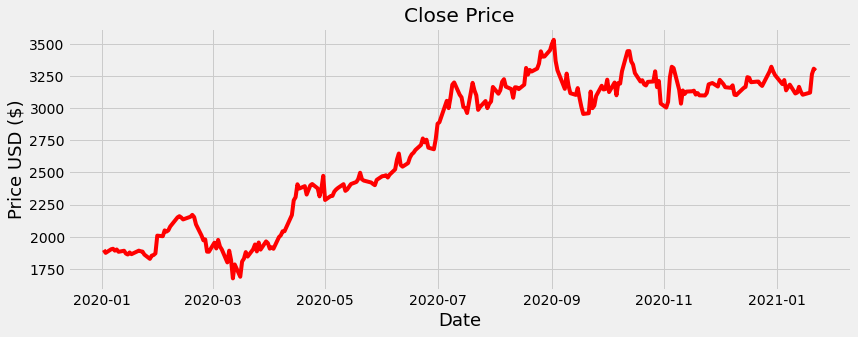

In [ ]:
plt.figure(figsize = (12.5, 4.5))
plt.plot(df['Close'], label = 'Close', color = 'red')
plt.title('Close Price')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price USD ($)', fontsize = 18)
plt.show()

Calculating the On Balance Volume (OBV)


In [ ]:
OBV = []
OBV.append(0)

Loop through the data set (Close price) from the second row (index 1) to the end of the data set
 - If  Closing price is greater than the previous day close price then append the previous day OBV and current volume.
 - If Closing price is less than the previous day close price then append the previous day OBV and subtract current volume.
 - If Closing price is equal to the prevous day close price then append the previous day OBV.

In [ ]:
for i in range(1, len(df.Close)):
  if df.Close[i] > df.Close[i-1]:
    OBV.append(OBV[-1] + df.Volume[i])
  elif df.Close[i] < df.Close[i-1]:
    OBV.append(OBV[-1] - df.Volume[i])
  else:
    OBV.append(OBV[-1])

Storing the OBV and OBV EMA into new colums.

- EMA: Exponential Moving Averages
- The ewm() function is used to provide exponential weighted functions. (source google Apr 21,2020)


In [ ]:
df['OBV'] = OBV
df['OBV_EMA'] = df['OBV'].ewm(span = 20).mean()

Show the data

In [ ]:
df

,High,Low,Open,Close,Volume,Adj Close,OBV,OBV_EMA
Date,,,,,,,,
2020-01-02,1898.010010,1864.150024,1875.000000,1898.010010,4029000,1898.010010,0,0.000000e+00
2020-01-03,1886.199951,1864.500000,1864.500000,1874.969971,3764400,1874.969971,-3764400,-1.976310e+06
2020-01-06,1903.689941,1860.000000,1860.000000,1902.880005,4061800,1902.880005,297400,-1.141417e+06
2020-01-07,1913.890015,1892.040039,1904.500000,1906.859985,4044900,1906.859985,4342300,4.416471e+05
2020-01-08,1911.000000,1886.439941,1898.040039,1891.969971,3508000,1891.969971,834300,5.366265e+05
...,...,...,...,...,...,...,...,...
2021-01-15,3142.550049,3095.169922,3123.020020,3104.250000,4214200,3104.250000,108629200,1.106182e+08
2021-01-19,3145.000000,3096.000000,3107.000000,3120.760010,3305100,3120.760010,111934300,1.107435e+08
2021-01-20,3279.800049,3175.000000,3181.989990,3263.379883,5309800,3263.379883,117244100,1.113626e+08


Creating and ploting the graph between OBV and OBV_EMA

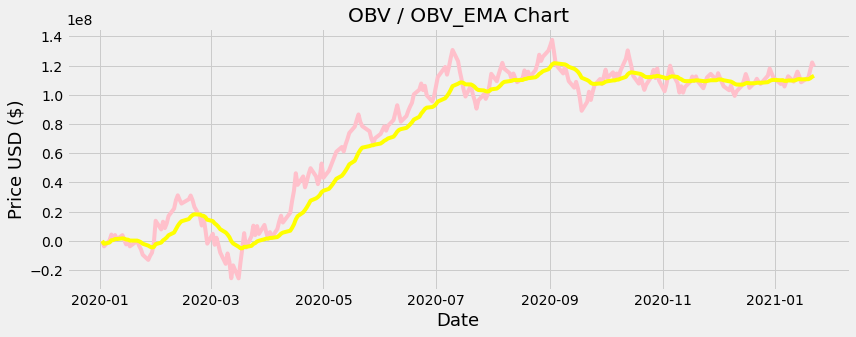

In [ ]:
plt.figure(figsize = (12.5, 4.5))
plt.plot(df['OBV'], label = 'OBV', color = 'pink')
plt.plot(df['OBV_EMA'], label = 'OBV_EMA', color = 'yellow')
plt.title('OBV / OBV_EMA Chart')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price USD ($)', fontsize = 18)
plt.show()

Here the idea is:
- Buy the stock whenever the OBV goes above the OBV_EMA.
- Sell the stock whenever the OBV_EMA goes above the OBV.

Creating a function to signal when we should have to buy and sell the stock.
- If OBV > OBV_EMA : BUY
- If OBV < OBV_EMA : SELL
- Othervise do nothing

In [ ]:
def buy_sell(signal, col1, col2):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1

  #looping through the lenght of dat set
  for i in range(0, len(signal)):

    #If OBV > OBV_EMA Then BUY --> col1 => 'OBV' and col2 =>'OBV_EMA'
    if signal[col1][i] > signal[col2][i] and flag != -1:
      sigPriceBuy.append(signal['Close'][i])
      sigPriceSell.append(np.nan)
      flag = 1

    #If OBV < OBV_EMA Then SELL
    elif signal[col1][i] < signal[col2][i] and flag != 0:
      sigPriceSell.append(signal['Close'][i])
      sigPriceBuy.append(np.nan)
      flag = 0

    #If OBV < OBV_EMA
    else:
        sigPriceSell.append(np.nan)
        sigPriceBuy.append(np.nan)
  
  return (sigPriceBuy, sigPriceSell)

Create BUY and SELL columns


In [ ]:
x = buy_sell(df, 'OBV', 'OBV_EMA')
df['Buy_Signal_Price'] = x[0]
df['Sell_Signal_Price'] = x[1]

Show the Data set

In [ ]:
df

,High,Low,Open,Close,Volume,Adj Close,OBV,OBV_EMA,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,
2020-01-02,1898.010010,1864.150024,1875.000000,1898.010010,4029000,1898.010010,0,0.000000e+00,NaN,NaN
2020-01-03,1886.199951,1864.500000,1864.500000,1874.969971,3764400,1874.969971,-3764400,-1.976310e+06,NaN,1874.969971
2020-01-06,1903.689941,1860.000000,1860.000000,1902.880005,4061800,1902.880005,297400,-1.141417e+06,1902.880005,NaN
2020-01-07,1913.890015,1892.040039,1904.500000,1906.859985,4044900,1906.859985,4342300,4.416471e+05,1906.859985,NaN
2020-01-08,1911.000000,1886.439941,1898.040039,1891.969971,3508000,1891.969971,834300,5.366265e+05,1891.969971,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-01-15,3142.550049,3095.169922,3123.020020,3104.250000,4214200,3104.250000,108629200,1.106182e+08,NaN,3104.250000
2021-01-19,3145.000000,3096.000000,3107.000000,3120.760010,3305100,3120.760010,111934300,1.107435e+08,3120.760010,NaN
2021-01-20,3279.800049,3175.000000,3181.989990,3263.379883,5309800,3263.379883,117244100,1.113626e+08,3263.379883,NaN


Plotting the BUY and SELL prices between Buy_Signal_Price and Sell_Signal_Price 

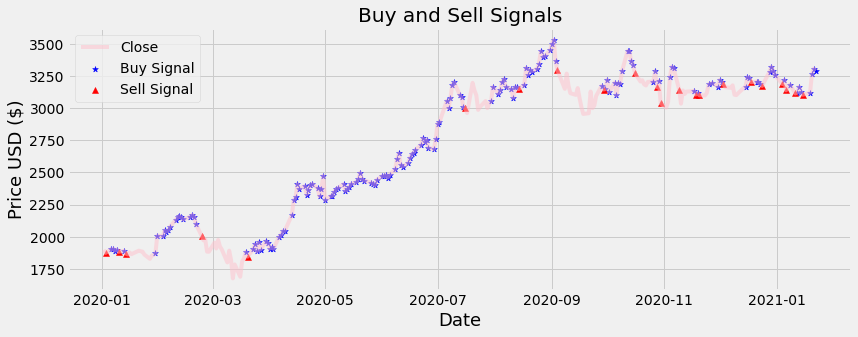

In [ ]:
plt.figure(figsize = (12.5, 4.5))
plt.plot(df['Close'], label = 'Close', color = 'pink', alpha = 0.5)
plt.scatter(df.index, df['Buy_Signal_Price'], label = 'Buy Signal', marker = '*', alpha = 1, color = 'blue')
plt.scatter(df.index, df['Sell_Signal_Price'], label = 'Sell Signal', marker = '^', alpha = 1, color = 'red')
plt.title('Buy and Sell Signals')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price USD ($)', fontsize = 18)
plt.legend(loc = 'upper left')
plt.show()

# COMPLETED